20 images loaded


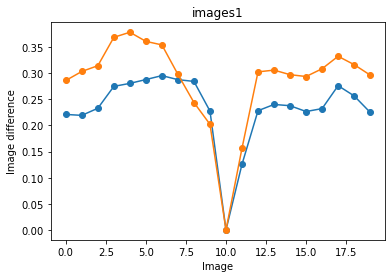

20 images loaded


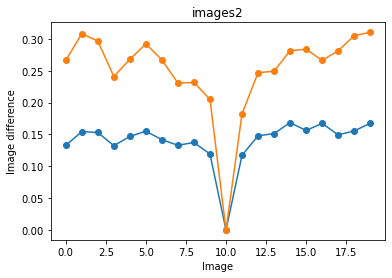

40 images loaded


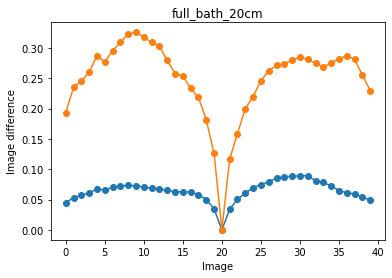

40 images loaded


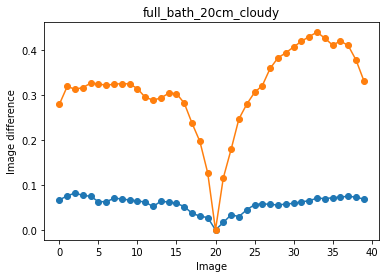

40 images loaded


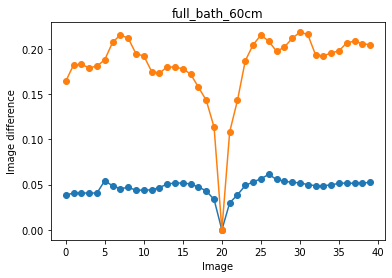

40 images loaded


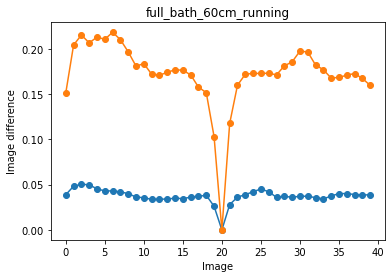

In [9]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import stitch

def imdiff(im1,im2):
    return cv2.absdiff(im1,im2).mean()

# Plot RIDFs for unprocessed (blue) and histeq'd (red) images
def plot_ridfs(dirname):
    images = stitch.load_images_greyscale(dirname)

    # Load histeq'd versions of images
    eqimages = []
    for path in stitch.get_image_paths(dirname):
        im = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        equ = cv2.equalizeHist(im)
        eqimages.append(equ.astype(np.double) / float(255))
    
    snap = images[len(images) // 2]
    diffs = [imdiff(im, snap) for im in images]
    eqsnap = eqimages[len(eqimages) // 2]
    eqdiffs = [imdiff(im, eqsnap) for im in eqimages]

    # Blue: normal; red: histeq'd images
    plt.plot(diffs, '-o', eqdiffs, '-o')
    plt.title(dirname)
    plt.xlabel('Image')
    plt.ylabel('Image difference')
    plt.show()

plot_ridfs('images1')
plot_ridfs('images2')
plot_ridfs('full_bath_20cm')
plot_ridfs('full_bath_20cm_cloudy')
plot_ridfs('full_bath_60cm')
plot_ridfs('full_bath_60cm_running')